## Exercise: Signal Selection and Invariant Mass

This example starts with a very simple toy model and uses pandas. Here's the toy:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

N = 10_000

df = pd.DataFrame({
    "event_id": np.arange(N),
    "px": rng.normal(0, 20, size=N),
    "py": rng.normal(0, 20, size=N),
    "pz": rng.normal(0, 50, size=N),
    "E": rng.normal(100, 10, size=N),
    "label": rng.choice(["signal", "background"], size=N, p=[0.1, 0.9]),
})

We are generating some unphysical events, but that's fine for now, we will filter them later.

## Step 1: Compute transverse momentum

$$
p_T = \sqrt{p_x^2 + p_y^2}
$$

<!--
df["pt"] = np.sqrt(df.px**2 + df.py**2)
-->

In [3]:
px = df["px"] 
py = df["py"] 

df["pt"] = np.sqrt(px**2 + py**2)

## Step 2: Select signal events with pt > 30

<!--
signal_highpt = df[(df.label == "signal") & (df.pt > 30)]
-->

In [4]:
signal_highpt = df[df.pt > 30 ]

Histogram of number of signal events vs pt

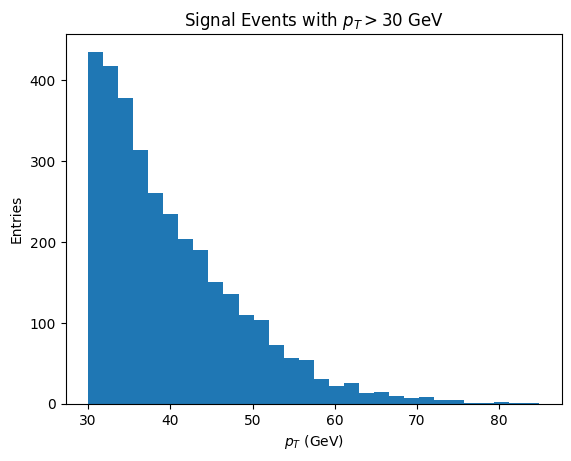

In [5]:
signal_highpt.pt.plot.hist(bins=30)
plt.title("Signal Events with $p_T > 30$ GeV")
plt.xlabel("$p_T$ (GeV)")
plt.ylabel("Entries")
plt.show()

## Step 3: Compute invariant mass:

$$
m^2 = E^2 - \vec{p}^2
$$

<!--
df["mass_squared"] = df.E**2 - (df.px**2 + df.py**2 + df.pz**2)
-->

In [6]:

df["mass_squared"] = df["E"]**2 - (df["px"]**2 + df["py"]**2 + df["pz"]**2) 

# Filter unphysical entries from our simple generation
df = df[df.mass_squared > 0]

df["mass"] = np.sqrt(df.mass_squared)

## Plot histogram of invariant mass for all events

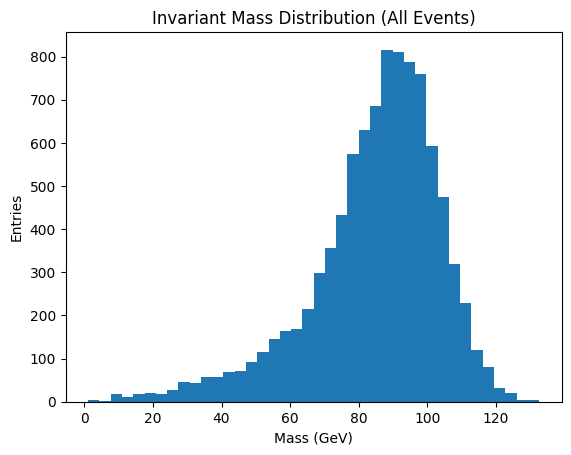

In [7]:
df.mass.plot.hist(bins=40)
plt.title("Invariant Mass Distribution (All Events)")
plt.xlabel("Mass (GeV)")
plt.ylabel("Entries")
plt.show()